In [17]:
import numpy as np
import matplotlib.pyplot as plt
from ROOT import *
import os
from iminuit import Minuit
from iminuit.cost import LeastSquares

In [18]:
def rd_data(str):
    arr0=np.array([])
    for line in open(str):
        d=line.split()
        if len(d) != 1:
            continue
        arr0=np.append(arr0,float(d[0]))
    return arr0  


def getDATA(str):
    main_path=os.getcwd()
    
    for folder_path,folders,files in os.walk(main_path+str):
        a=1
    
    N=len(files)
    angles=np.array([])
    for i in range(0,N):
        arr=files[i].split('.')
        angles=np.append(angles,float(arr[0]))
    
    items={
        f'array{num+1}':[] for num in range(N)
    }
    
    mean_values=np.array([])
    std_devs=np.array([])
    for i in range(0,N):
        items[i]=rd_data(main_path+str+'/'+files[i])
        mean_values=np.append(mean_values,items[i].mean())
        std_devs=np.append(std_devs,items[i].std())
         
    angles,mean_values=zip(*sorted(zip(angles,mean_values)))
    angles=list(angles); mean_values=list(mean_values)  ##devo convertire in float
    for i in range(0,len(angles)):
        angles[i]=float(angles[i]); mean_values[i]=float(mean_values[i])

    return np.array(angles)*np.pi/180,np.array(mean_values),std_devs

def plot_and_fit(arr0,arr1,arr2):
    angles=np.linspace(1.4,2.2,100)
    def model(x,p):
        return p[0]*np.cos(x+p[1])**2+p[2]
    fnc = LeastSquares(arr0, arr1, arr2, model)
    m = Minuit(fnc, (2.2,-1.7, 0))
    m.migrad()
    print(m)
    fig=plt.figure()
    plt.errorbar(arr0,arr1,yerr=arr2,color='black',fmt='o')
    plt.plot(angles,model(angles,m.values),color='r')
    plt.show()
    
    return fig



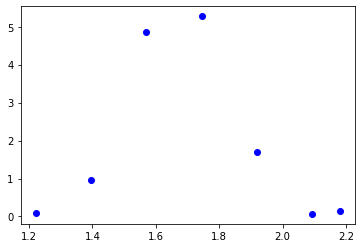

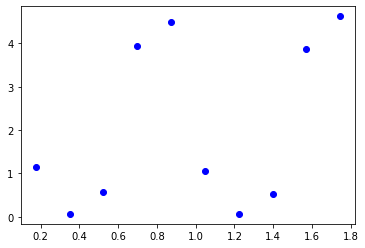

In [19]:
##DATI ACQUA
plt.plot(getDATA('/data/data_H2O')[0],getDATA('/data/data_H2O')[1],'bo')   
plt.show()

##DATI ARIA
plt.plot(getDATA('/data/data_air')[0],getDATA('/data/data_air')[1],'bo')   
plt.show()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.15e+05 (chi2/ndof = 153749.1)│              Nfcn = 165              │
│ EDM = 1.01e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──

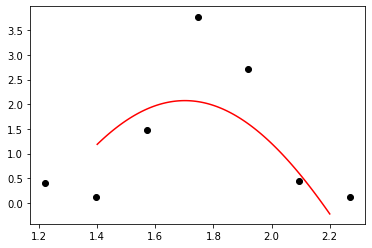

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.479e+06 (chi2/ndof = 619847.7)│              Nfcn = 216              │
│ EDM = 2.99e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─

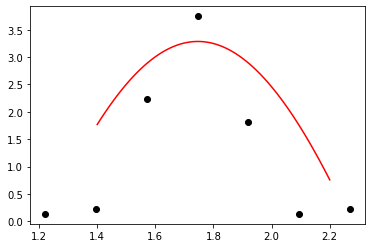

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.447e+06 (chi2/ndof = 861771.0)│              Nfcn = 216              │
│ EDM = 5.1e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─

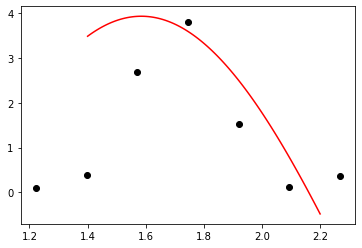

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.614e+05 (chi2/ndof = 215343.7)│              Nfcn = 226              │
│ EDM = 4.07e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─

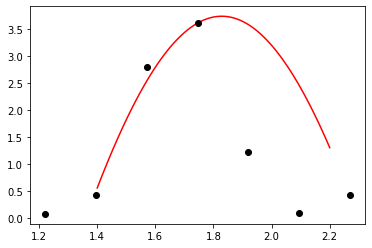

In [20]:
figZ1=plot_and_fit(getDATA('/data/data_Z1')[0],getDATA('/data/data_Z1')[1],getDATA('/data/data_Z1')[2])
figZ2=plot_and_fit(getDATA('/data/data_Z2')[0],getDATA('/data/data_Z2')[1],getDATA('/data/data_Z2')[2])
figZ4=plot_and_fit(getDATA('/data/data_Z4')[0],getDATA('/data/data_Z4')[1],getDATA('/data/data_Z4')[2])
figZ8=plot_and_fit(getDATA('/data/data_Z8')[0],getDATA('/data/data_Z8')[1],getDATA('/data/data_Z8')[2])

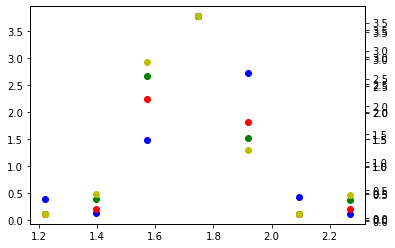

In [21]:
fig,ax0=plt.subplots()
ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax3 = ax0.twinx()
ax0.plot(getDATA('/data/data_Z1')[0],getDATA('/data/data_Z1')[1],'bo')
ax1.plot(getDATA('/data/data_Z2')[0],getDATA('/data/data_Z2')[1],'ro')
ax2.plot(getDATA('/data/data_Z4')[0],getDATA('/data/data_Z4')[1],'go')
ax3.plot(getDATA('/data/data_Z8')[0],getDATA('/data/data_Z8')[1],'yo')

 FCN=6.52432e-08 FROM MIGRAD    STATUS=CONVERGED     499 CALLS         500 TOTAL
                     EDM=7.29539e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.54958e+00   3.80360e-03   1.50143e-05   4.60851e-01
   2  p1          -8.06663e+00   1.85938e-02  -2.23052e-05  -1.03260e+00
   3  p2           3.36241e-01   4.74513e-03   1.94485e-05  -2.85469e-01
   4  p3           4.51998e+00   1.07424e-02   1.17674e-05  -2.07381e+00


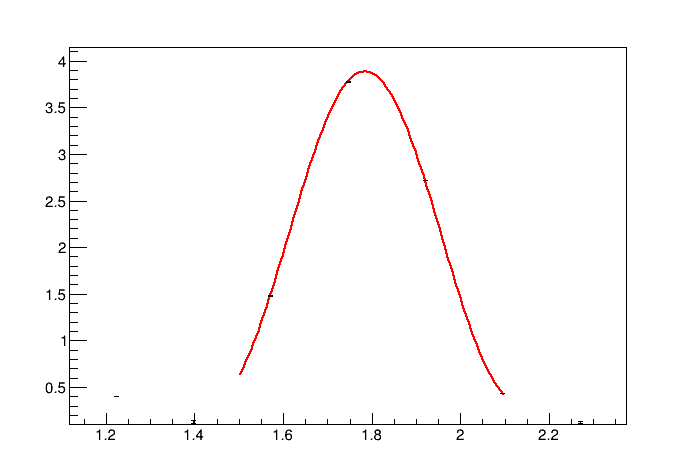

In [46]:
g=TGraphErrors()
f=TF1('f','[0]*pow(cos([3]*x+[1]),2)+[2]')
f.SetParameters(4,-1.7,0,1)
f.SetParLimits(0,0,6)
##f.SetParLimits(1,-3,-1)
f.SetParLimits(2,0,1)
##f.SetParLimits(3,1,2)
for i in range(0,len(getDATA('/data/data_Z1')[0])):
    g.SetPoint(i,getDATA('/data/data_Z1')[0][i],getDATA('/data/data_Z1')[1][i])
    g.SetPointError(i,0,getDATA('/data/data_Z1')[2][i])
    
    
c1=TCanvas()
c1.Draw()
g.Fit('f','','',1.5,2.1)
g.Draw('ap')